# Calculation of Energy Demands for CdTe Module Manufacturing

This journal documents the calculations of the energy demands to manufacture an average CdTe module, based on industry and literature data.

In [1]:
import numpy as np
import pandas as pd
import os,sys
from pathlib import Path
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
plt.rcParams['figure.figsize'] = (12, 8)

In [2]:
baselinesfolder = str(Path().resolve().parent.parent /'PV_ICE' / 'baselines')
supportMatfolder = str(Path().resolve().parent.parent / 'PV_ICE' / 'baselines' / 'SupportingMaterial')


In [3]:
cwd = os.getcwd() #grabs current working directory
print(cwd)

C:\Users\hmirletz\Documents\GitHub\PV_ICE\docs\baseline development documentation


In [4]:
skipcols = ['Source', 'Notes']
e_modmfg_raw = pd.read_csv(os.path.join(supportMatfolder, "input-energy-CdTe-moduleMFGing.csv"), index_col='year')
                           #, usecols=lambda x: x not in skipcols)

In [5]:
e_modmfg_raw.dropna(how='all')

,Module MFGing Energy CdTe [kWh/m2],Source,Notes
year,,,
2002,32.4000,"Fthenakis, via IEA PVPS via Junbluth",includes module mfging and operations
2005,58.1000,"Jungbluth, Niels, Matthias Stucki, and Rolf Fr...","Fthenakis 2005 data, module mfg including depo..."
2008,28.5000,"Frischknecht, Rolf, Rene Itten, Parikhit Sinha...",Ohio 2008
2010,33.4000,"Frischknecht, P Stolz, Luana Krebs, Mariska de...","Malaysia 2010, series 4 or 6"
2013,30.2000,"Wild-Scholten, M. J. de. “Energy Payback Time ...","table 1 page301, fab electricity consumption"
2015,40.5000,"Frischknecht, P Stolz, Luana Krebs, Mariska de...","Ohio 2015, series 4 or 6, nat gas and electricity"
2018,42.5347,FirstSolar. “First Solar Sustainability Metric...,"page 3, likely includes elec and fuel, using s..."
2021,24.3500,"Wikoff, Hope M., Samantha B. Reese, and Matthe...",reported EPD value
2022,21.6000,FirstSolar. “FirstSolar Sustainability Report ...,"page 30, includes electricity and fuel, using ..."


Text(0.5, 1.0, 'Module MFGing Energy CdTe [kWh/m2]')

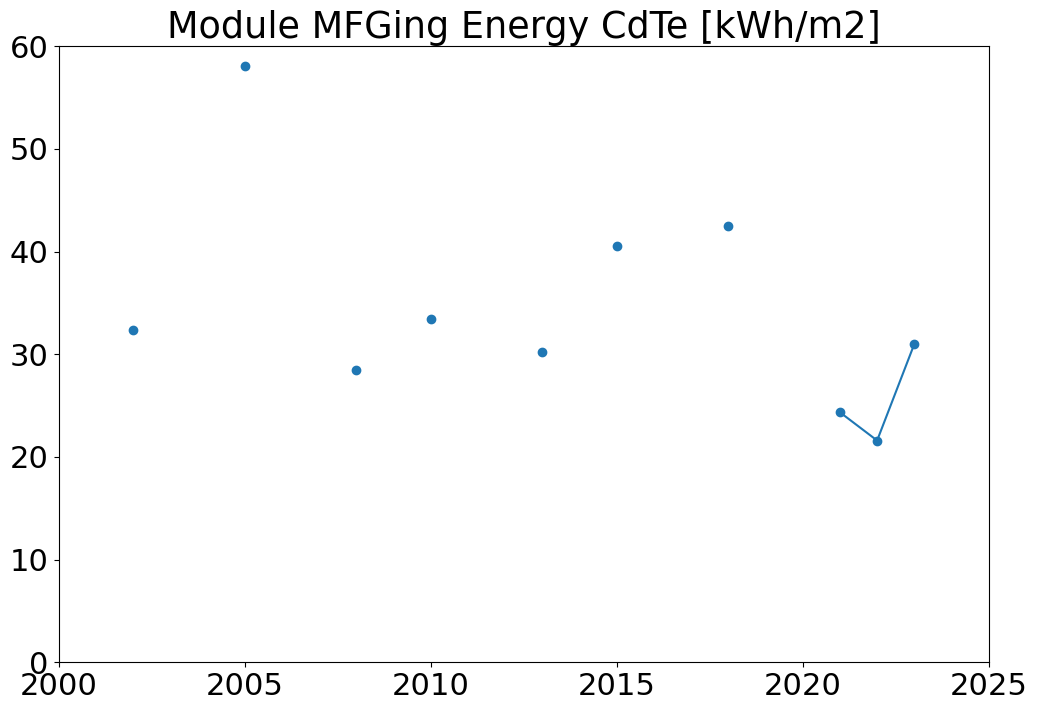

In [6]:
plt.plot(e_modmfg_raw.index, e_modmfg_raw.iloc[:,0], marker='o')
plt.xlim(2000,2025)
plt.ylim(0,60)
plt.title(e_modmfg_raw.columns[0])

In [7]:
e_modmfg_raw.iloc[2005-1995,2]

'Fthenakis 2005 data, module mfg including deposition, etching, cleaning, assembly and overhead operations'

In [8]:
e_modmfg_raw.iloc[2022-1995,2]

'page 30, includes electricity and fuel, using series 6 data'

From the raw data, There is an outlier in 2005, likely because this energy includes not only module assembly but overhead operations as well. We will drop this data point to focus on module mfging.

Also possible that the 2021-2022 data point is outlier low. This is calculated from the First Solar Sustainability Report and the specs of the series 6 module (power and area) and their reported EPD. It is alternatively possible that the previous data points (which are highly self citing), are too high due to possibly including overhead operations. From the sustainability report, given that values of energy are reported per Wp, and the module efficiency and size continue to get larger, it is possible that the manufacturing energy hasn't decreased on a per area basis (but looks like improvement on a per watt basis). Or it's the total manufacturing energy demand divided by total manufactured in Wp. 

(0.0, 60.0)

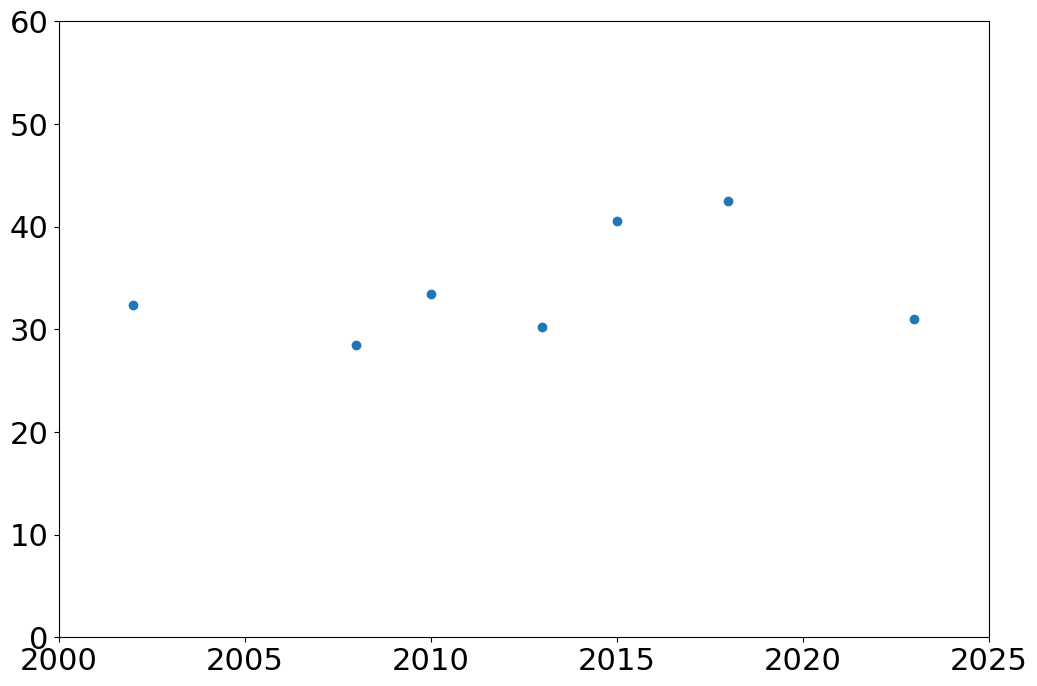

In [13]:
e_modmfg_tidy = e_modmfg_raw.iloc[:,0].copy()
e_modmfg_tidy.loc[e_modmfg_tidy.idxmax(),]=np.nan #find the max and set it to Nan
e_modmfg_tidy.loc[e_modmfg_tidy.idxmin(),]=np.nan #find the min and set it to Nan
e_modmfg_tidy.loc[2021]=np.nan

plt.plot(e_modmfg_tidy, marker='o')
plt.xlim(2000,2025)
plt.ylim(0,60)

Removed outliers, now  linearly interpolate between available data.

(0.0, 60.0)

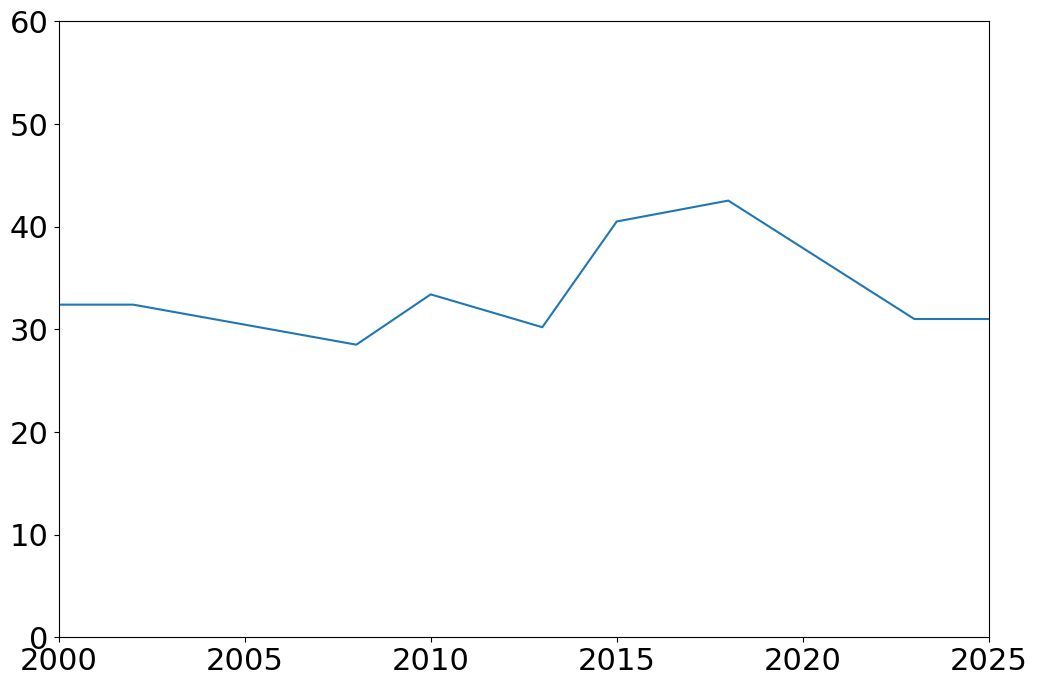

In [14]:
e_modmfg_filled = e_modmfg_tidy.interpolate(method='linear', limit_direction='both') 
plt.plot(e_modmfg_filled)
plt.xlim(2000,2025)
plt.ylim(0,60)

In [15]:
#trim early years
e_modmfg = e_modmfg_filled.loc[e_modmfg_filled.index>=1995]*1000 #in Wh/m2)
e_modmfg.columns=['Module Assembly Energy Whpm2']

In [16]:
#print to csv in Wh/m2
e_modmfg.to_csv(os.path.join(supportMatfolder,"output-energy-module-mfg-CdTe.csv"))